In [1]:
# SEHS4696 Machine Learning for Data Mining
# Group Project
# Topic: Trends in Discharges and Deaths

# author: SEHS4696 MACHINE LEARNING FOR DATA MINING (Group 5)
# Student names and numbers: 22060542S CHAN Ka Lok
#                            22059790S CHEN Yuanhang
#                            22059727S FUNG Ho Wai
#                            22059069S HO Man Kit
#                            22053502S LUI Wing Ho

In [2]:
# reference list
# https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python
# https://www.kaggle.com/code/prashant111/arima-model-for-time-series-forecasting/notebook
# https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt
import pandas as pd
import numpy as np
!pip install pmdarima
import pmdarima as pm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load the dataset into a dataframe called myDF
# Refer to Monthly rent per square meter (HKD)
df = pd.read_csv('2.1M.csv', header=1)

#Check the dataset infomation (find out total 10 columns and 3090 rows)
print(df.head(100))
print(myDF.info())
 

      Month Grade A Sheung Wan Grade A Sheung Wan - Remarks  Grade A Central  \
0   01-1999                247                            X              470   
1   02-1999                289                            X              424   
2   03-1999                317                            X              414   
3   04-1999                265                            X              405   
4   05-1999                256                          NaN              403   
..      ...                ...                          ...              ...   
95  12-2006                445                          NaN              583   
96  01-2007                433                          NaN              660   
97  02-2007                482                          NaN              605   
98  03-2007                327                          NaN              647   
99  04-2007                415                          NaN              681   

   Grade A Central - Remarks  Grade A W

NameError: name 'myDF' is not defined

In [5]:
# ** 2. Data Preprocessing
# -- 2.1 Drop Unnecessary Features
df.drop('Grade A Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade A Central - Remarks',axis=1,inplace=True)
df.drop('Grade A Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade A North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade A Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade A Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade A Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

df.drop('Grade B Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade B Central - Remarks',axis=1,inplace=True)
df.drop('Grade B Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade B North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade B Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade B Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade B Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

df.drop('Grade C Sheung Wan - Remarks',axis=1,inplace=True)
df.drop('Grade C Central - Remarks',axis=1,inplace=True)
df.drop('Grade C Wan Chai / Causeway Bay - Remarks',axis=1,inplace=True)
df.drop('Grade C North Point / Quarry Bay - Remarks',axis=1,inplace=True)
df.drop('Grade C Tsim Sha Tsui - Remarks',axis=1,inplace=True)
df.drop('Grade C Yau Ma Tei / Mong Kok - Remarks',axis=1,inplace=True)
df.drop('Grade C Kowloon Bay / Kwun Tong - Remarks',axis=1,inplace=True)

# Refer to Monthly rent per square meter (HKD)

df = df.set_index('Month')
df.index = pd.to_datetime(df.index)
#df.index = pd.to_datetime(df.index, format="%m-%Y")
#Declare var col for the choosen column
col = 'Grade A Central'
df = df[[col]]
print(df)

            Grade A Central
Month                      
1999-01-01              470
1999-02-01              424
1999-03-01              414
1999-04-01              405
1999-05-01              403
...                     ...
2023-09-01             1043
2023-10-01             1004
2023-11-01             1017
2023-12-01              956
2024-01-01              899

[301 rows x 1 columns]


In [6]:
# -- 2.2 Handle missing data, if any
missing_data = df.isnull().sum()
print(missing_data)


Grade A Central    0
dtype: int64


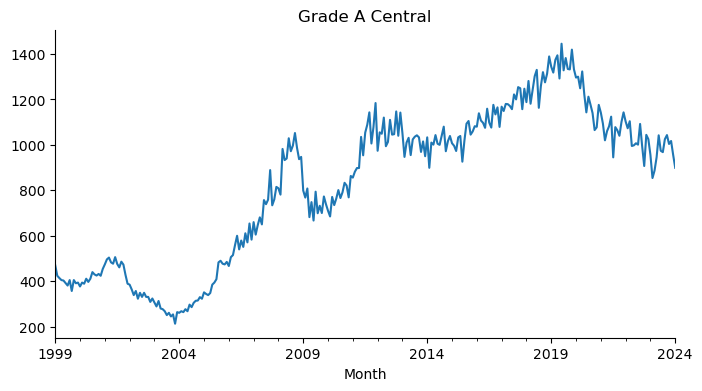

In [7]:
#Times series ( a series of data points recorded at different time intervals)
# A basic graph to show the data
from matplotlib import pyplot as plt
df[col].plot(kind='line', figsize=(8, 4), title=col)
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
#AutoARIMA model
#Seasonal - fit stepwise auto-ARIMA
model = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=3641.242, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=3299.244, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=3503.501, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=3648.374, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=3362.605, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=3240.462, Time=1.02 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=3636.732, Time=0.76 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=3183.913, Time=1.70 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=3240.674, Time=0.54 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  301
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1580.894
Date:                            Tue, 30 Apr 2024   AIC                           3173.787
Time:                                    00:54:12   BIC                           3195.786
Sample:                                01-01-1999   HQIC                          3182.602
                                     - 01-01-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4491      0.057      7.852      0.000       0.337       0.561
ar.L2          0.3308      0.061      5.413      0.000       0.211       0.451
ar.L3          0.1870      0.056      3.345      0.001       0.077       0.297
ar.S.L12      -0.7183      0.058    -12.390      0.000      -0.832      -0.605
ar.S.L24      -0.4328      0.056     -7.697      0.000      -0.543      -0.323
sigma2      3186.2965    231.487     13.764      0.000    2732.591    3640.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.61
Prob(Q):                              0.98   Prob(JB):                         0.06
Heteroskedasticity (H):               3.11   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

TypeError: unhashable type: 'numpy.ndarray'

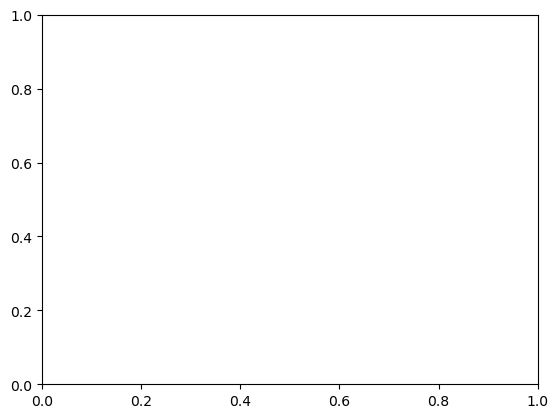

In [10]:
# Forecast
n_periods = 36
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.15)

plt.title("SARIMA -Property - Time Series Dataset")
plt.show()

In [11]:
# Linear Regression
df = pd.read_csv('2.1M.csv', header=1)
X = df['Month']
y = df['Grade A Central']
x_train, x_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state = 5 )
print(x_train)
print(Y_train)

273    10-2021
260    09-2020
211    08-2016
134    03-2010
11     12-1999
        ...   
8      09-1999
73     02-2005
118    11-2008
189    10-2014
206    03-2016
Name: Month, Length: 240, dtype: object
273    1040
260    1140
211    1076
134     771
11      394
       ... 
8       357
73      344
118     937
189     972
206    1107
Name: Grade A Central, Length: 240, dtype: int64


In [13]:
# Linear Regression
model= LinearRegression()
model.fit(X=x_train,y=Y_train)

ValueError: could not convert string to float: '10-2021'

In [ ]:
train_score = model.score(X_train, y_train)
